In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

from surprise import SVD, Dataset, Reader

![WhatsApp Image 2024-11-17 at 00.17.36_9119a4c4.jpg](<attachment:WhatsApp Image 2024-11-17 at 00.17.36_9119a4c4.jpg>)
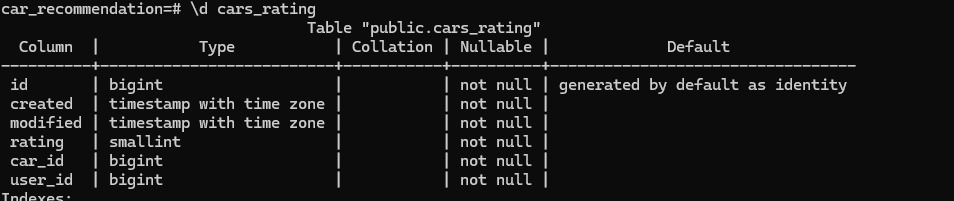

In [2]:
data = pd.read_csv('datasets/test/gpt.csv')\
         .dropna()

data = data.merge(right = data['user_id'].value_counts().reset_index(),
                  on = ['user_id'],
                  how = 'left')

data = data[data['count'] > 10].drop(columns = 'count')

# Analyze cumulative energy for SVD

Get SVD matrices to calculate cumulative energy

In [3]:
# convert matrix in sparse one
data_sparse = csr_matrix(data, dtype = np.float32)

# perform SVD Decomposition
U, sigma, Vt = svds(data_sparse, k = min(data_sparse.shape) - 1)

# sort singular value descendingly
sigma = np.flip(np.sort(sigma))

# calculate cumulative energy
explained_variance_ratio = (sigma ** 2) / (np.sum(sigma ** 2))
explained_variance_cumsum = np.cumsum(explained_variance_ratio)

Plot cumulative energy

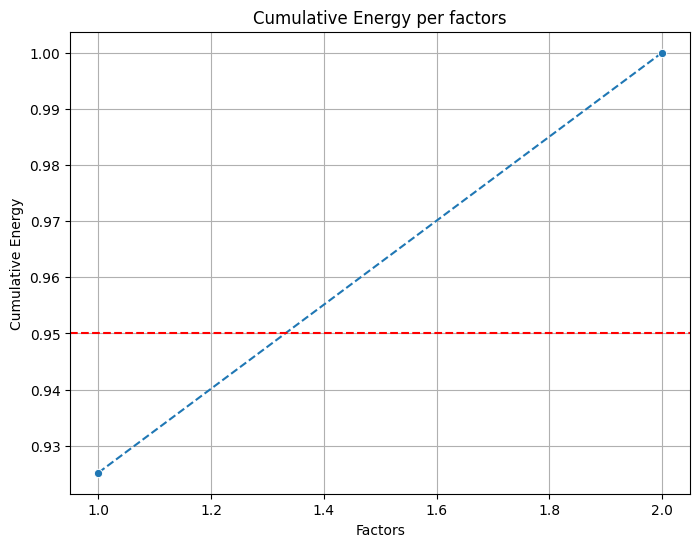

In [8]:
plt.figure(figsize = (8,6))
sns.lineplot(x = range(1, len(explained_variance_cumsum) + 1),
             y = explained_variance_cumsum,
             marker = 'o',
             ls = '--')
plt.title('Cumulative Energy per factors')
plt.xlabel('Factors')
plt.ylabel('Cumulative Energy')
plt.axhline(y = 0.95, color = 'r', ls = '--')
plt.grid(True)
plt.show()

# Mask part of the elements

Split data into subsets

In [33]:
train_set, test_set = train_test_split(data,
                                       test_size = 0.20,
                                       stratify = data['user_id'],
                                       shuffle = True,
                                       random_state = 123)

Define surprise parameters

In [36]:
# define max score
max_score = 5

# create reader from Surprise
reader = Reader(rating_scale = (0, max_score))

# load training set in Surprise format
train_set_sur = Dataset.load_from_df(train_set, reader).build_full_trainset()

# prepare testing set as a list of tuples (user_id, item_id, rating)
test_set_sur = list(test_set.itertuples(index = False, name = None))

In [37]:
test_set_sur

[(21, 36, 3.8),
 (32, 44, 4.5),
 (80, 10, 4.1),
 (93, 23, 3.9),
 (46, 46, 2.9),
 (6, 44, 2.1),
 (17, 30, 4.4),
 (93, 5, 1.2),
 (16, 28, 3.3),
 (57, 33, 1.6),
 (32, 8, 3.6),
 (100, 49, 4.2),
 (34, 24, 1.6),
 (4, 37, 3.9),
 (77, 32, 2.9),
 (77, 3, 4.6),
 (49, 23, 2.4),
 (35, 24, 1.1),
 (90, 35, 1.3),
 (4, 46, 3.7),
 (67, 24, 3.6),
 (37, 36, 4.6),
 (39, 30, 2.7),
 (9, 38, 4.6),
 (88, 5, 4.0),
 (44, 42, 3.3),
 (47, 12, 2.3),
 (50, 6, 4.4),
 (35, 39, 1.8),
 (45, 11, 4.0),
 (45, 1, 2.5),
 (34, 36, 2.4),
 (98, 18, 1.6),
 (60, 13, 1.7),
 (50, 28, 2.3),
 (33, 24, 4.3),
 (40, 16, 3.0),
 (80, 16, 3.3),
 (34, 35, 1.8),
 (33, 9, 4.7),
 (26, 36, 2.4),
 (97, 2, 3.6),
 (49, 8, 4.9),
 (35, 12, 2.4),
 (67, 47, 3.9),
 (45, 9, 1.7),
 (46, 11, 4.0),
 (21, 5, 4.1),
 (83, 30, 3.0),
 (26, 40, 2.3),
 (60, 27, 2.9),
 (70, 2, 1.2),
 (44, 24, 1.2),
 (80, 10, 4.1),
 (21, 36, 3.8),
 (99, 27, 4.4),
 (4, 37, 3.9),
 (47, 33, 2.7),
 (9, 15, 1.5),
 (77, 3, 4.6),
 (88, 5, 4.0),
 (9, 47, 1.7),
 (28, 40, 2.2),
 (47, 6, 1.9